# Project 1 Insurance Cost Analysis

In [3]:
!pip install seaborn

In [5]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [10]:
# load the data ino pandas data frame

import pandas as pd

# Define the URL of the CSV file
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Use pandas to read the CSV file directly from the URL
df = pd.read_csv(filepath)

# Display the first few rows of the DataFrame
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [13]:
# Add the headers to the data
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

# replace the entries with NAN values
df.replace('?', np.nan, inplace = True)

## Data Wrangling

In [16]:
print(df.info())
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
2766,False,False,False,False,False,False,False
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False


In [19]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
print(df.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None
        age  gender    bmi  no_of_children  smoker  region  charges
0     False   False  False           False   False   False    False
1     False   False  False           False   False   False    False
2     False   False  False           False   False   False    False
3     False   False  False           False   False   False    False
4     False   False  False           False   False   False    False
...     ...   

In [22]:
# Round charges and bmi columns to 2 d.p.
df[['charges']]=np.round(df[['charges']],2)
df[['bmi']]=np.round(df[['bmi']],2)
print(df.head())

   age  gender    bmi  no_of_children  smoker  region   charges
0   18       2  33.77               1       0       4   1725.55
1   28       2  33.00               3       0       4   4449.46
2   33       2  22.70               0       0       1  21984.47
3   32       2  28.88               0       0       1   3866.86
4   31       1  25.74               0       0       4   3756.62


## Exploratory Data Analysis

<Axes: xlabel='charges', ylabel='bmi'>

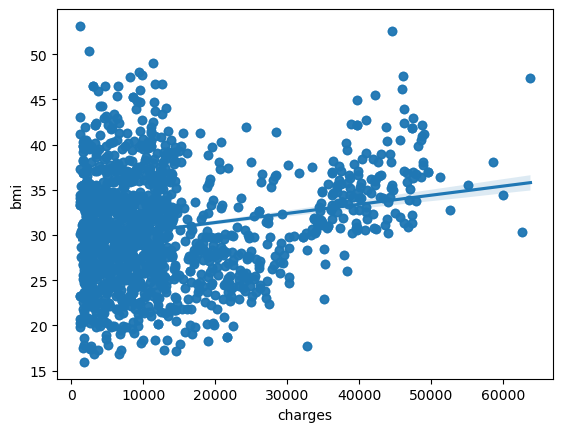

In [27]:
# Regression plot charges agianst bmi
sns.regplot(x="charges", y="bmi", data=df)

<Axes: xlabel='charges', ylabel='smoker'>

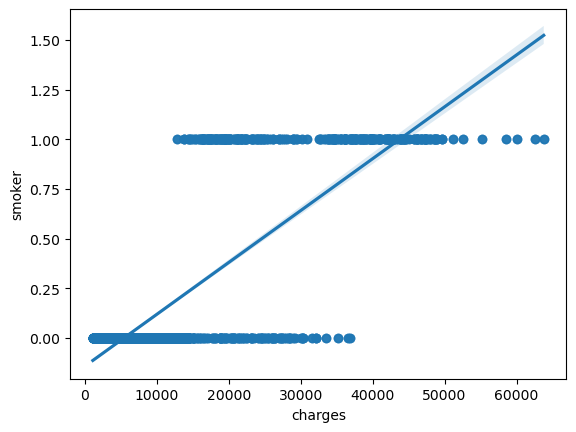

In [29]:
# Regression plot charges against smoker
sns.regplot(x="charges", y="smoker", data=df)

In [31]:
#Correlation Matrix
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112864        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042771        0.015693  0.083125   
bmi             0.112864  0.042771  1.000000       -0.001638  0.011817   
no_of_children  0.037126  0.015693 -0.001638        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011817        0.007016  1.000000   
region         -0.006969  0.022360  0.271172       -0.025594  0.053839   
charges         0.298892  0.062959  0.199899        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271172  0.199899  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


## Model Development

In [33]:
# Fit a linear regression with smoker as the predictor and charges as the dependent variable
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6227430402464125


In [35]:
# Linear regression for other attributes
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.750587353164716


In [40]:
# Creating a training pipeline that uses Z on Y
Input=[('scale', StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
      ('model', LinearRegression())
      ]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z, Y)
Ypipe=pipe.predict(Z)
print(r2_score(Y,Ypipe))

0.8453674189608673


## Model Refinement

In [43]:
#Split the data into training and testing
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254189445922837


In [44]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208363986356139
